<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Researching the Momentum Factor

Momentum investing says that excess returns can be generated by buying recent winners and selling recent losers. In this notebook we will research the momentum factor on our universe of demo stocks. This will help us determine whether we have a profitable idea before turning to a full backtest.  

First, load your historical data into pandas.

In [1]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2017-01-01", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  \
Field Date                                                         
Close 2017-01-03         27.1748        102.3847        116.6655   
      2017-01-04         27.1443        102.6583        117.6992   
      2017-01-05         27.2824        102.8146        116.3094   
      2017-01-06         27.5865        105.6682        115.9880   
      2017-01-09         27.8392        106.4695        116.6655   

Sid               FIBBG000BMHYD1  FIBBG000BPH459  FIBBG000GZQ728  \
Field Date                                                         
Close 2017-01-03         98.9239         57.6454         67.3082   
      2017-01-04         98.7616         57.3875         66.5677   
      2017-01-05         99.7949         57.3875         65.5753   
      2017-01-06         99.3167         57.8849         65.5383   
      2017-01-09         99.2996         57.7006         64.4571   

Sid               FIBBG00B3T3HD3  
Field Date                        
Close 2017-01-03         28.5558  
      2017-01-04         29.9722  
      2017-01-05         30.3584  
      2017-01-06         30.3882  
      2017-01-09         29.1996

Next, we use closing prices to calculate our momentum factor. We calculate momentum using a twelve-month window but excluding the most recent month, as commonly recommended by academic papers. 

In [11]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
earlier_closes = closes.shift(MOMENTUM_WINDOW)
later_closes = closes.shift(RANKING_PERIOD_GAP)
momentum_returns = (later_closes - earlier_closes) / earlier_closes

Now that we have the twelve-month returns, we calculate the next day returns:

In [12]:
next_day_returns = closes.pct_change().shift(-1)

To see if the twelve-month returns predict next-day returns, we will split the twelve-month returns into bins and look at the mean next-day return of each bin. To do this, we first need to stack our wide-form DataFrames into Series. 

In [13]:
momentum_returns = momentum_returns.stack(dropna=False)
next_day_returns = next_day_returns.stack(dropna=False)

In [18]:
next_day_returns

Date        Sid           
2017-01-03  FIBBG000B9XRY4   -0.001122
            FIBBG000BFWKC0    0.002672
            FIBBG000BKZB36    0.008860
            FIBBG000BMHYD1   -0.001641
            FIBBG000BPH459   -0.004474
                                ...   
2022-12-09  FIBBG000BKZB36         NaN
            FIBBG000BMHYD1         NaN
            FIBBG000BPH459         NaN
            FIBBG000GZQ728         NaN
            FIBBG00B3T3HD3         NaN
Length: 10472, dtype: float64

Use pandas' `qcut` function to create the bins: 

In [19]:
import pandas as pd

# For a very small demo universe, you might only want 2 quantiles 
num_bins = 2
bins = pd.qcut(momentum_returns, num_bins)

Now group the next day returns by momentum bin and plot the mean return:

<AxesSubplot:title={'center':'Next-day return by 12-month momentum bin'}>

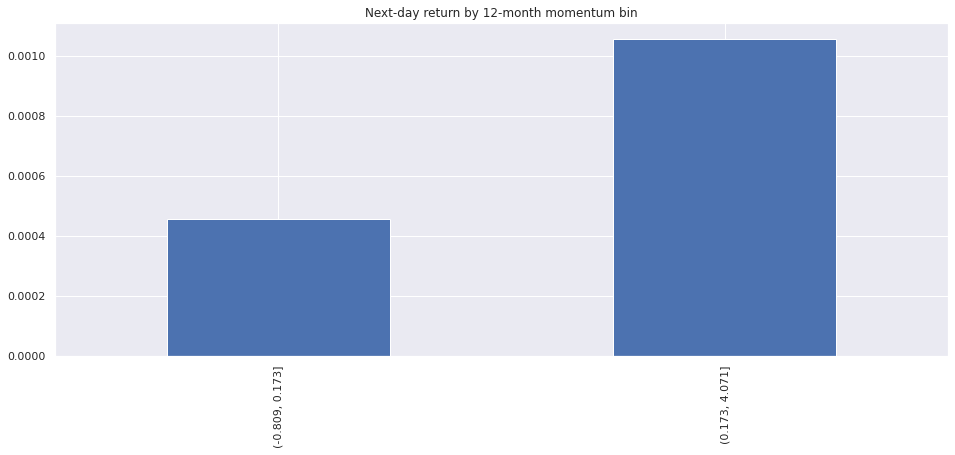

In [20]:
next_day_returns.groupby(bins).mean().plot(kind="bar", title="Next-day return by 12-month momentum bin")

For a predictive factor, the higher quantiles should perform better than the lower quantiles.

***

## *Next Up*

Part 4: [Moonshot Strategy Code](Part4-Moonshot-Strategy-Code.ipynb)